In [276]:
#pip install matplotlib

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
# imports
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

In [240]:
# Use raw string (r"") or double backslashes to avoid path issues
file_path = r"C:\Users\yaniv\OneDrive\Desktop\Datathon\Hackaton0404\ED_full_data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

In [241]:
processed = df.copy()
processed['timestamp'] = pd.to_datetime(df['timestamp'], utc=True, format='mixed')
processed['clean_timestamp'] = processed['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S') #Without utc and microseconds

In [242]:
processed = df.copy()
processed['timestamp'] = pd.to_datetime(df['timestamp'], utc=True, format='mixed')
processed['clean_timestamp'] = processed['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S') #Without utc and microseconds

In [243]:
print(processed['clean_timestamp'].head())
print(processed['clean_timestamp'].tail())

0    2023-11-08 08:12:03
1    2023-11-08 08:12:03
2    2024-03-18 10:08:57
3    2024-03-18 10:08:58
4    2024-03-18 13:54:53
Name: clean_timestamp, dtype: object
463892    2025-01-23 10:07:21
463893    2025-01-23 10:10:50
463894    2025-01-23 10:14:00
463895    2025-01-23 10:14:00
463896    2025-01-23 10:14:01
Name: clean_timestamp, dtype: object


In [244]:
# Create date and time columns
processed['clean_timestamp'] = pd.to_datetime(processed['clean_timestamp'])
processed['date'] = processed['clean_timestamp'].dt.date
processed['time'] = processed['clean_timestamp'].dt.time
print(processed['time'].head())
print(processed['date'].head())

0    08:12:03
1    08:12:03
2    10:08:57
3    10:08:58
4    13:54:53
Name: time, dtype: object
0    2023-11-08
1    2023-11-08
2    2024-03-18
3    2024-03-18
4    2024-03-18
Name: date, dtype: object


In [245]:
# Remove old columns
processed = processed.drop(columns=['clean_timestamp', 'timestamp'], axis=1)

In [246]:
processed

,department,room,requirement,status,date,time
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53
...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00
463895,A,A104,תפוס,required,2025-01-23,10:14:00


In [247]:
# Convert to datetime
processed['date'] = pd.to_datetime(processed['date'])

In [248]:
processed 

,department,room,requirement,status,date,time
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53
...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00
463895,A,A104,תפוס,required,2025-01-23,10:14:00


In [249]:
# Extract year, month, day
processed['day'] = processed['date'].dt.day
processed['month'] = processed['date'].dt.month
processed['year'] = processed['date'].dt.year

In [250]:
processed

,department,room,requirement,status,date,time,day,month,year
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03,8,11,2023
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03,8,11,2023
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57,18,3,2024
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58,18,3,2024
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53,18,3,2024
...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21,23,1,2025
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50,23,1,2025
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00,23,1,2025
463895,A,A104,תפוס,required,2025-01-23,10:14:00,23,1,2025


In [251]:
# Extract hour, minute and seconds
processed['time'] = pd.to_datetime(processed['time'], format='%H:%M:%S').dt.time
processed['hours'] =  processed['time'].apply(lambda x: x.hour)
processed['minutes'] = processed['time'].apply(lambda x: x.minute)
processed['seconds'] = processed['time'].apply(lambda x: x.second)

In [252]:
processed

,department,room,requirement,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,A104,ניקיון تنظيف,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,A104,ניקיון تنظيف,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,T5,כח עזר - אוכל,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,C316,בדיקת רופא,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,A104,בדיקת דם,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,A104,תפוס,required,2025-01-23,10:14:00,23,1,2025,10,14,0


In [253]:
processed['requirement'].unique()

array(['רמת דחיפות', 'ניקיון تنظيف', 'כח עזר - אוכל', 'כח עזר - שונות',
       'צר"פ', 'כביסה', 'כח עזר - סיוע למטופל', 'תפוס', 'בדיקת דם',
       'בדיקת אק"ג', 'יעוץ', 'נקיון - החלפת פרגוד', 'נקיון - בידוד',
       'בדיקת רופא'], dtype=object)

In [254]:
# Label Encoding
encoder = LabelEncoder()
processed['requirements_category'] = encoder.fit_transform(processed['requirement'])

In [255]:
# Label mapping
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nCategory to Label Mapping:")
print(category_mapping)


Category to Label Mapping:
{'בדיקת אק"ג': np.int64(0), 'בדיקת דם': np.int64(1), 'בדיקת רופא': np.int64(2), 'יעוץ': np.int64(3), 'כביסה': np.int64(4), 'כח עזר - אוכל': np.int64(5), 'כח עזר - סיוע למטופל': np.int64(6), 'כח עזר - שונות': np.int64(7), 'ניקיון تنظيف': np.int64(8), 'נקיון - בידוד': np.int64(9), 'נקיון - החלפת פרגוד': np.int64(10), 'צר"פ': np.int64(11), 'רמת דחיפות': np.int64(12), 'תפוס': np.int64(13)}


In [256]:
# Move new column next to requirements column
cols = list(processed.columns)
cols.remove('requirements_category')  # Remove column 'C'
cols.insert(3, 'requirements_category')  # Insert column 'C' after 'A'
processed = processed[cols]
processed

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,מיון קורונה ב`,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,A104,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,A104,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,T5,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,A114,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,C316,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,A104,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,A104,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0


## Remove empty rows

In [257]:
# Remove all rows with any empty (NaN) cells
processed = processed.dropna()

processed

df = processed

## Change room values

In [258]:
unique_rooms = df['room'].unique()

print(unique_rooms)

['חדר הלם' 'מיון קורונה ב`' 'A104' 'T5' 'T6' 'T2' 'T3' 'T4' 'A113' 'A111'
 'חדר גבס 5' 'A117' 'A109' 'A108' 'A107' 'A106' 'A112' 'A114' 'A115'
 'A116' 'A101' 'A102' 'A103' 'A105' 'A110' 'C309' 'C310' 'C303' 'C306'
 'C307' 'C301' 'C315' 'C304' 'C316' 'B204' 'B210' 'B206' 'B203' 'B202'
 'B214' 'C302' 'B201' 'C320' '431' 'טריאז 3' 'טריאז 2' 'דמים' 'T1' 'B217'
 'B209' 'טריאז 1' '404-405' '403' 'B205' 'B216' 'C312' 'המתנה כללי'
 '404/405' '418' 'חדר ספטי 9' 'המתנה פנימי' 'חדר בידוד 1' 'חדר טיפולים 7'
 '117' 'ממתין להחלטה' 'עיניים' '9' '21' '18' '39' 'ממתין למכתב שחרור'
 'ממתין ליעוץ' '50' '2' '23' '30' '7' '28' '16' '12' 'ממתין לבדיקות מעבדה'
 '15' '3' '17' 'חדר בידוד' '8' '19' '6' '29' '4' '13' '14' 'צילום' ' '
 'CT' 'B213' '215' '24' 'B215' 'אורולוג' '201' 'ממתין לאשפוז' 'C318' '415'
 'C321' '1' '27' '25' 'רופא מהלכים 4' '10' '26' '22' 'ממתין לתשובת הדמיה'
 '11' 'א.א.ג.' 'חדר גבס' 'נשים' '101' 'רופא מהלכים 3' '63' 'US'
 'רופא מהלכים 1' '61' '20' '62' '5' '55' '109' '203' '208' '214' 'B208

In [259]:
# Create a dictionary mapping non-numeric values to unique integers
room_mapping = {value: i for i, value in enumerate(unique_rooms, 1)}

# Opt into the future behavior
pd.set_option('future.no_silent_downcasting', True)

df.loc[:, 'room'] = df['room'].replace(room_mapping)

In [260]:
df

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,1,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,2,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,3,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,3,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,4,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,18,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,34,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,3,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,3,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0


In [267]:
df.loc[:, 'room'] = df['room'].astype(int)

In [271]:
print(df.dtypes)

department                       object
room                              int64
requirement                      object
requirements_category             int64
status                           object
date                     datetime64[ns]
time                             object
day                               int32
month                             int32
year                              int32
hours                             int64
minutes                           int64
seconds                           int64
dtype: object


In [268]:
non_numeric_values = df['room'][df['room'].apply(lambda x: not isinstance(x, (int, float)))].unique()

# Print the non-numeric values
print(non_numeric_values)

nan_values = df['room'][df['room'].isna()]

# Print the rows with NaN values
print(nan_values)

[]
Series([], Name: room, dtype: int64)


In [269]:
df

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,1,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,2,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,3,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,3,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,4,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,18,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,34,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,3,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,3,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0


In [279]:
df['requirement'].unique()

array(['רמת דחיפות', 'ניקיון تنظيف', 'כח עזר - אוכל', 'כח עזר - שונות',
       'צר"פ', 'כביסה', 'כח עזר - סיוע למטופל', 'תפוס', 'בדיקת דם',
       'בדיקת אק"ג', 'יעוץ', 'נקיון - החלפת פרגוד', 'נקיון - בידוד',
       'בדיקת רופא'], dtype=object)

In [280]:
# Label mapping
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nCategory to Label Mapping:")
print(category_mapping)


Category to Label Mapping:
{'בדיקת אק"ג': np.int64(0), 'בדיקת דם': np.int64(1), 'בדיקת רופא': np.int64(2), 'יעוץ': np.int64(3), 'כביסה': np.int64(4), 'כח עזר - אוכל': np.int64(5), 'כח עזר - סיוע למטופל': np.int64(6), 'כח עזר - שונות': np.int64(7), 'ניקיון تنظيف': np.int64(8), 'נקיון - בידוד': np.int64(9), 'נקיון - החלפת פרגוד': np.int64(10), 'צר"פ': np.int64(11), 'רמת דחיפות': np.int64(12), 'תפוס': np.int64(13)}


In [281]:
# Move new column next to requirements column
cols = list(df.columns)
cols.remove('requirements_category')  # Remove column 'C'
cols.insert(3, 'requirements_category')  # Insert column 'C' after 'A'
df = df[cols]
df

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds
0,מיון כירורגיה - מ.הלכים,1,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3
1,מיון פנימי,2,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3
2,A,3,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57
3,A,3,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58
4,טראומה חדש,4,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,18,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21
463893,C,34,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50
463894,A,3,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0
463895,A,3,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0


In [283]:
# התחלה לפי הכללים: A=1, B/טראומה=2, C=3
# יצירת מילון לפי חוקי המיפוי
custom_mapping = {}
current_value = 1

# רשימת מחלקות ייחודיות
unique_departments = df['department'].dropna().unique()
for dept in unique_departments:
    dept_lower = dept.lower()
    if dept_lower == 'a':
        custom_mapping[dept] = 1
    elif 'b' in dept_lower or 'טראומה' in dept_lower:
        custom_mapping[dept] = 2
    elif 'c' in dept_lower:
        custom_mapping[dept] = 3

# מיפוי השאר עם ערכים עוקבים
used_values = set(custom_mapping.values())
for dept in unique_departments:
    if dept not in custom_mapping:
        while current_value in used_values:
            current_value += 1
        custom_mapping[dept] = current_value
        used_values.add(current_value)

# הוספת עמודת מיפוי חדשה
df['department_numeric'] = df['department'].map(custom_mapping)

In [284]:
df

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds,department_numeric
0,מיון כירורגיה - מ.הלכים,1,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3,4
1,מיון פנימי,2,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3,5
2,A,3,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57,1
3,A,3,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58,1
4,טראומה חדש,4,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,18,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21,1
463893,C,34,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50,3
463894,A,3,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0,1
463895,A,3,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0,1


In [285]:
# Function to check if value is numeric
def is_numeric(val):
    try:
        float(val)
        return True
    except:
        return False

# Get unique values
unique_statuses = df['status'].dropna().unique()
# Get unique values
unique_statuses = df['status'].dropna().unique()

# Separate numeric and non-numeric
non_numeric_statuses = [s for s in unique_statuses if not is_numeric(s)]
existing_numeric_values = [float(s) for s in unique_statuses if is_numeric(s)]
start_value = int(max(existing_numeric_values, default=0)) + 1

# Map non-numeric values
status_mapping = {status: i for i, status in enumerate(non_numeric_statuses, start=start_value)}

# Apply the mapping
df['status_numeric'] = df['status'].apply(lambda x: float(x) if is_numeric(x) else status_mapping.get(x))

In [286]:
df

,department,room,requirement,requirements_category,status,date,time,day,month,year,hours,minutes,seconds,department_numeric,status_numeric
0,מיון כירורגיה - מ.הלכים,1,רמת דחיפות,12,4,2023-11-08,08:12:03,8,11,2023,8,12,3,4,4.0
1,מיון פנימי,2,רמת דחיפות,12,3,2023-11-08,08:12:03,8,11,2023,8,12,3,5,3.0
2,A,3,ניקיון تنظيف,8,satisfied,2024-03-18,10:08:57,18,3,2024,10,8,57,1,6.0
3,A,3,ניקיון تنظيف,8,required,2024-03-18,10:08:58,18,3,2024,10,8,58,1,7.0
4,טראומה חדש,4,כח עזר - אוכל,5,satisfied,2024-03-18,13:54:53,18,3,2024,13,54,53,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,A,18,בדיקת רופא,2,satisfied,2025-01-23,10:07:21,23,1,2025,10,7,21,1,6.0
463893,C,34,בדיקת רופא,2,satisfied,2025-01-23,10:10:50,23,1,2025,10,10,50,3,6.0
463894,A,3,בדיקת דם,1,required,2025-01-23,10:14:00,23,1,2025,10,14,0,1,7.0
463895,A,3,תפוס,13,required,2025-01-23,10:14:00,23,1,2025,10,14,0,1,7.0


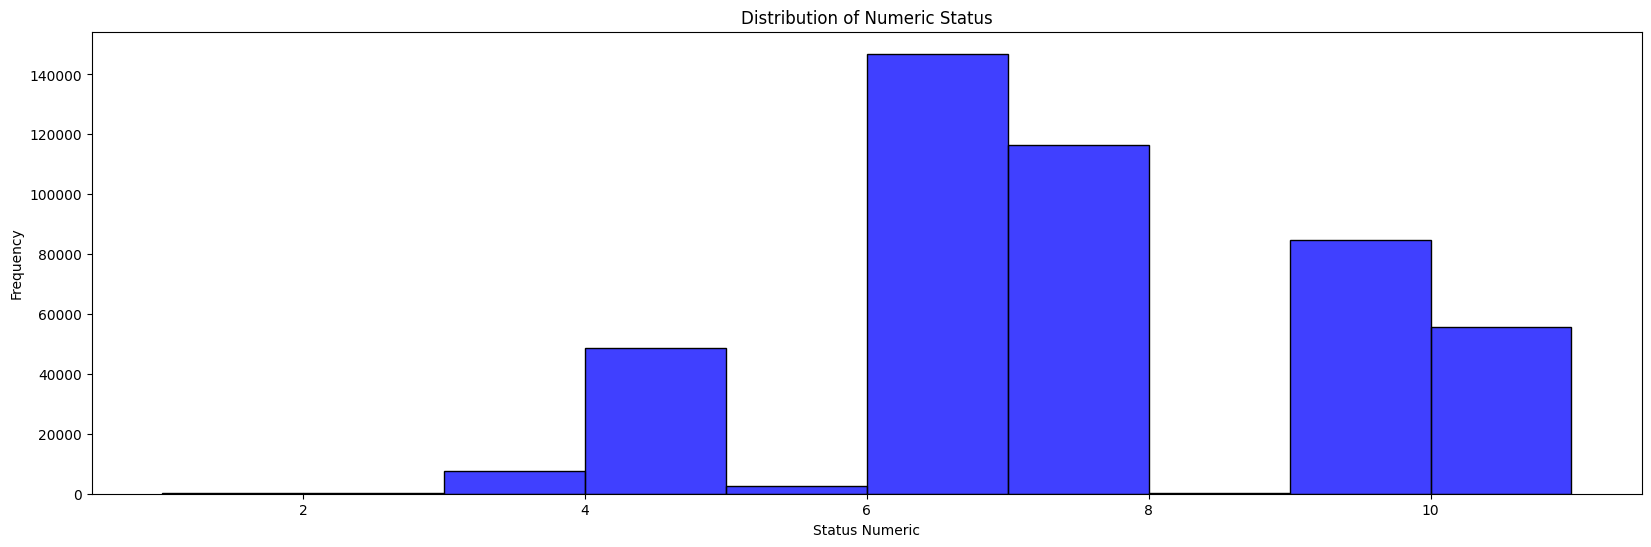

In [287]:
# Set up the plotting area
plt.figure(figsize=(20, 6))

# Plot Histogram
sns.histplot(df['status_numeric'], kde=False, bins=10, color='blue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Numeric Status')
plt.xlabel('Status Numeric')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [288]:
# show absolute correlation between features in a heatmap
def show_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Purples, vmin=-1, vmax=1)
    
  plt.show()
 

In [291]:
numeric_columns = df.select_dtypes(include=['int','float'])
numeric_columns

,room,requirements_category,day,month,year,hours,minutes,seconds,department_numeric,status_numeric
0,1,12,8,11,2023,8,12,3,4,4.0
1,2,12,8,11,2023,8,12,3,5,3.0
2,3,8,18,3,2024,10,8,57,1,6.0
3,3,8,18,3,2024,10,8,58,1,7.0
4,4,5,18,3,2024,13,54,53,2,6.0
...,...,...,...,...,...,...,...,...,...,...
463892,18,2,23,1,2025,10,7,21,1,6.0
463893,34,2,23,1,2025,10,10,50,3,6.0
463894,3,1,23,1,2025,10,14,0,1,7.0
463895,3,13,23,1,2025,10,14,0,1,7.0


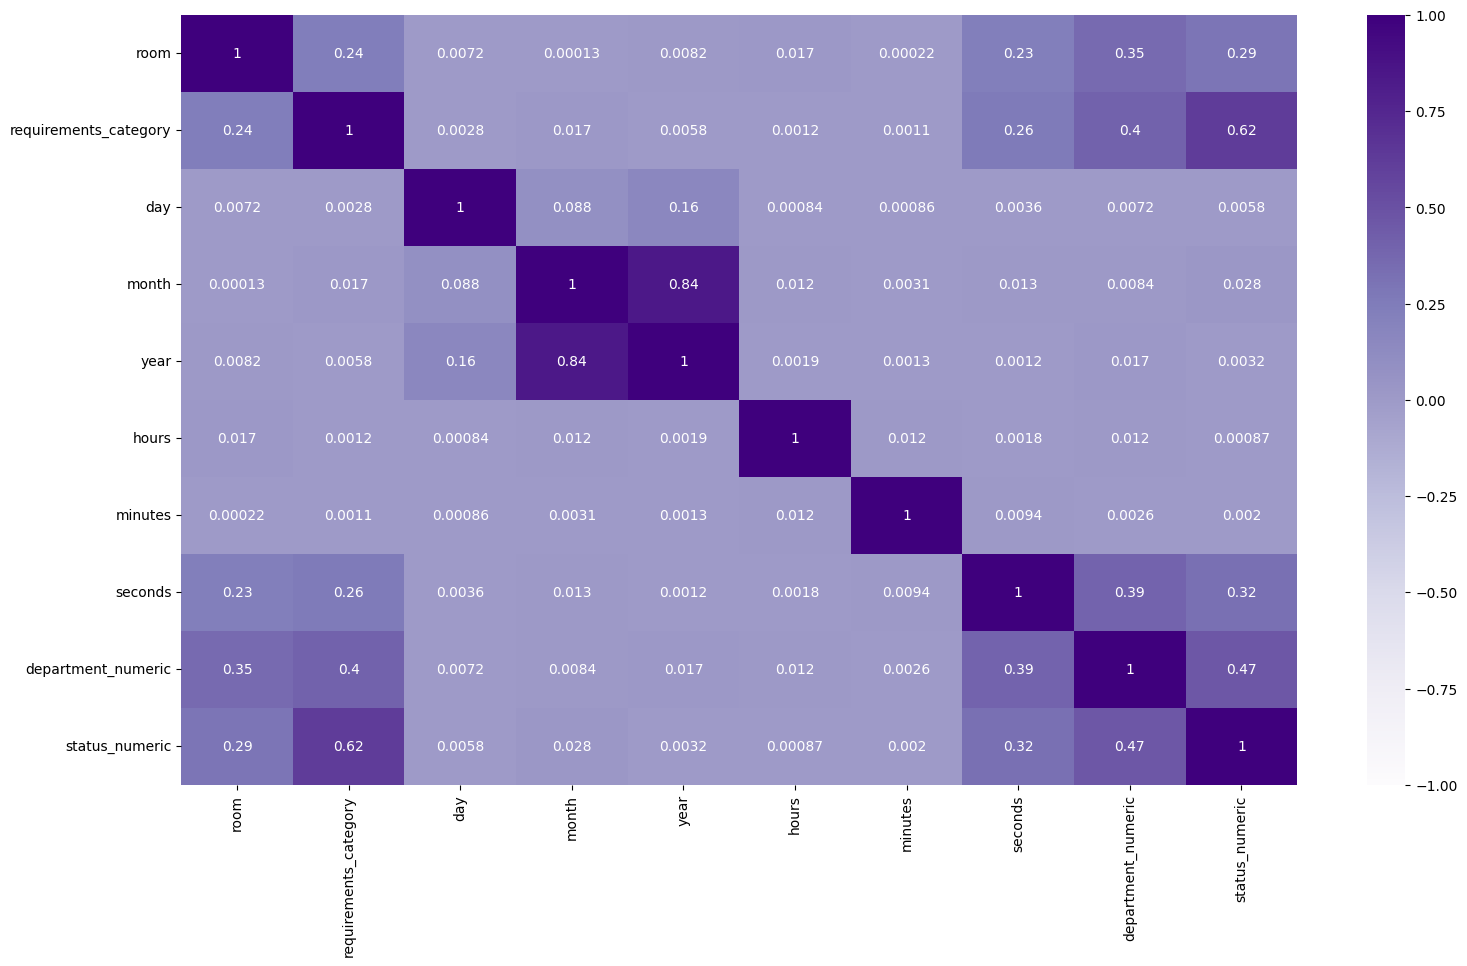

In [292]:
show_heatmap(numeric_columns)